# Ramesh Gopinath's Unsupervised Learning AIML Project

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

# Part A - Automobile

# 1 Data Understanding and Exploration

In [3]:
Car_df = pd.read_csv("Car name.csv")

In [4]:
Car_df

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [14]:
Car_attr_df = pd.read_json("Car-Attributes.json")

In [15]:
Car_attr_df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [17]:
print("Car name shape",Car_df.shape)
print("Car attr shape",Car_attr_df.shape)

Car name shape (398, 1)
Car attr shape (398, 8)


In [20]:
Car_final = pd.concat([Car_df, Car_attr_df], axis= 1)

In [21]:
Car_final.shape

(398, 9)

In [22]:
Car_final

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [52]:
Car_final.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [23]:
Car_final.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [24]:
Car_final.corr()

,mpg,cyl,disp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
wt,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

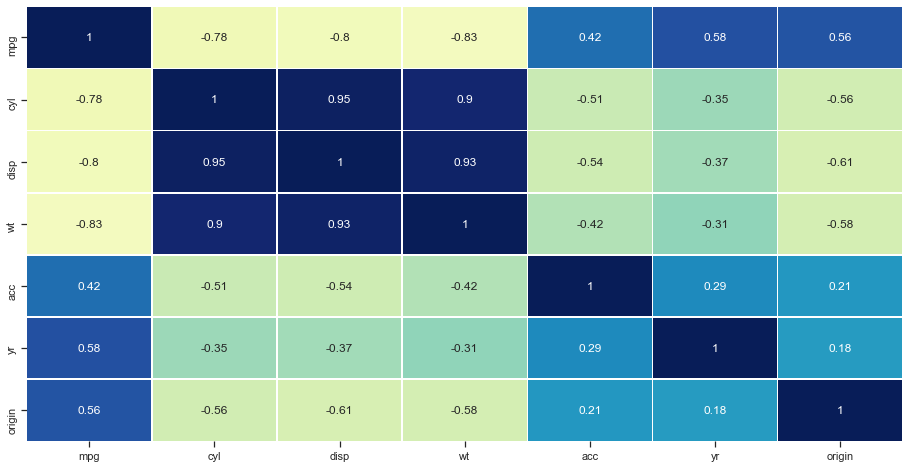

In [25]:
sns.set(rc={'figure.figsize':(15.7,8)})

sns.set(style="ticks", color_codes=True)

sns.heatmap(Car_final.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu")

# 2. Data preparation and Analysis

#2A... feature wise percentage of missing values

In [27]:
for i in Car_final.columns:
    if i == 'car_name':
        print("")
    else:    
        print("column name",i)
        print("missing values",Car_final[i].isnull().sum())
        print("% S unique values",Car_final[i].value_counts())
        print("")
    


column name mpg
missing values 0
% S unique values 13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
26.5     1
19.1     1
33.8     1
28.1     1
31.8     1
Name: mpg, Length: 129, dtype: int64

column name cyl
missing values 0
% S unique values 4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

column name disp
missing values 0
% S unique values 97.0     21
350.0    18
98.0     18
318.0    17
250.0    17
         ..
83.0      1
181.0     1
81.0      1
96.0      1
144.0     1
Name: disp, Length: 82, dtype: int64

column name hp
missing values 0
% S unique values 150    22
90     20
88     19
110    18
100    17
       ..
91      1
167     1
93      1
94      1
102     1
Name: hp, Length: 94, dtype: int64

column name wt
missing values 0
% S unique values 1985    4
2130    4
2720    3
2125    3
2300    3
       ..
3761    1
2223    1
2735    1
3245    1
2145    1
Name: wt, Length: 351, dtype: int64

column name acc
missing values 0
% S unique values 14

150    22
90     20
88     19
110    18
100    17
       ..
91      1
167     1
93      1
94      1
102     1
Name: hp, Length: 94, dtype: int64

In [58]:
Car_final.describe(include=object)

,car_name,hp
count,398,398
unique,305,94
top,ford pinto,150
freq,6,22


In [29]:
Car_final.duplicated().sum()

0

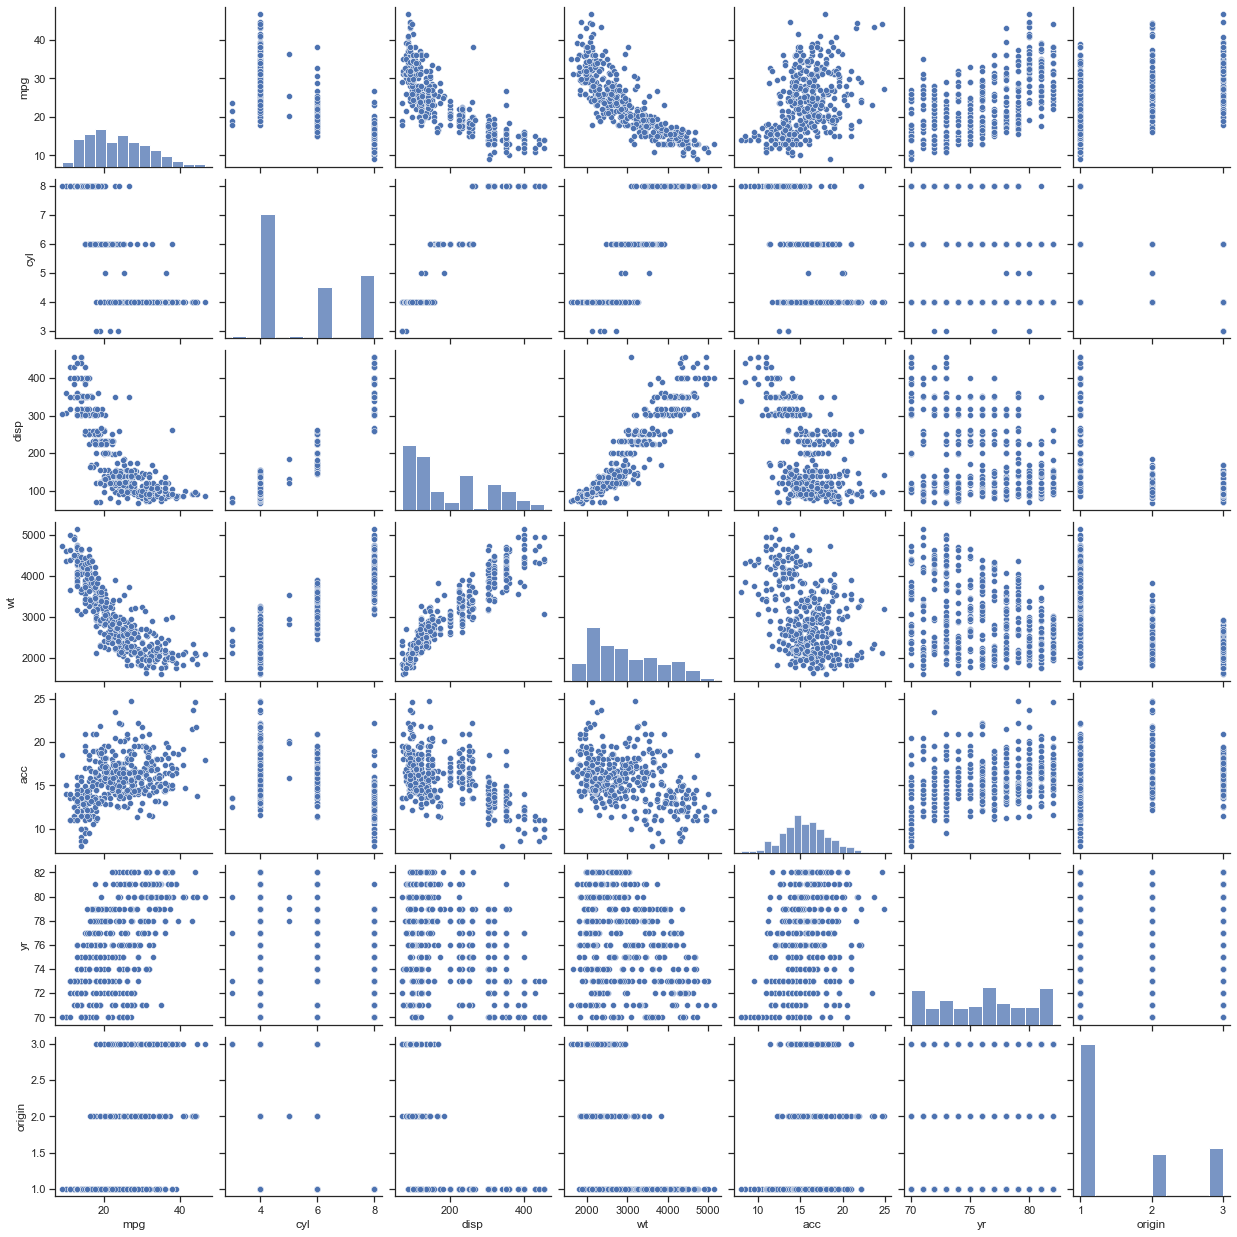

In [35]:
sns.set(rc={'figure.figsize':(18.7,1200.27)})

sns. set(style="ticks", color_codes=True)

#cols = Car_final[['P_incidence','S_slope','L_angle','S_Degree', 'P_radius','P_tilt','Class']]

sns.pairplot(Car_final);

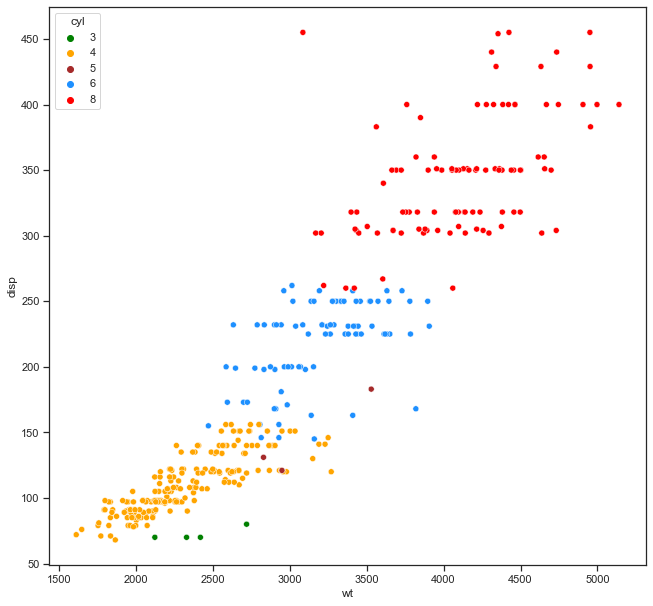

In [45]:
g =sns.scatterplot(x="wt", y="disp",
              hue="cyl",
              data=Car_final,
                  palette=['green','orange','brown','dodgerblue','red'], legend='full')


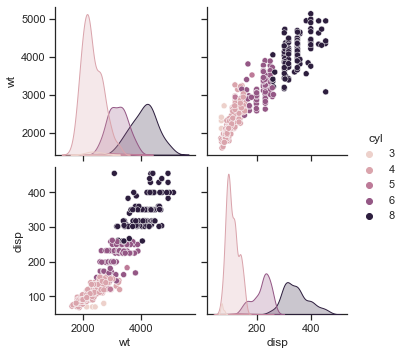

In [50]:
cols = Car_final[['wt','disp','cyl']]
sns.pairplot(cols, hue='cyl')

Weight and Displacement looks to be positively correlated and as the Cylinders keep increasing for every unit weight increase
there is a proportionate increase in the displacement...... 

small number of cylinders seem to be used in lesser weight cars while higher number of cylinders are used in heavier cars

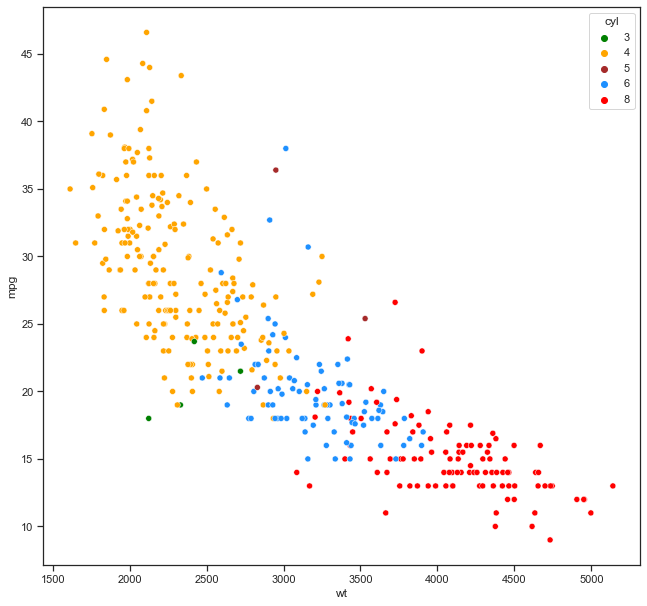

In [51]:
g =sns.scatterplot(x="wt", y="mpg",
              hue="cyl",
              data=Car_final,
                  palette=['green','orange','brown','dodgerblue','red'], legend='full')


In [ ]:
Weight and Miles per gallon are negatively correlated........ As the weight of the car increases the Fuel efficiency decreases..

Lighter cars are more Fuel efficient with higher miles per gallon while Heavier cars are bad at Fuel efficiency and gives
lesser Miles per gallon.

Heavier cars tend to have higher number of Cylinders

In [60]:
Car_final.loc[Car_final["hp"] == "?"].value_counts()

car_name              mpg   cyl  disp   hp  wt    acc   yr  origin
amc concord dl        23.0  4    151.0  ?   3035  20.5  82  1         1
ford maverick         21.0  6    200.0  ?   2875  17.0  74  1         1
ford mustang cobra    23.6  4    140.0  ?   2905  14.3  80  1         1
ford pinto            25.0  4    98.0   ?   2046  19.0  71  1         1
renault 18i           34.5  4    100.0  ?   2320  15.8  81  2         1
renault lecar deluxe  40.9  4    85.0   ?   1835  17.3  80  2         1
dtype: int64

In [61]:
Car_final['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
91      1
167     1
93      1
94      1
102     1
Name: hp, Length: 94, dtype: int64

In [104]:
Car_final.describe(include=object)

,car_name,hp
count,398,392.0
unique,305,93.0
top,ford pinto,150.0
freq,6,22.0


In [63]:
Car_final.hp = pd.to_numeric(Car_final.hp, errors="coerce")

In [103]:
Car_final.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [65]:
# Replace using median 
median = Car_final['hp'].median()

#Car_final['hp'].fillna(median, inplace=True)

In [66]:
median

93.5

In [102]:
Car_final.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [92]:
Car_final.loc[:,"hp"] = Car_final['hp'].astype('object')

In [97]:
Car_final.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [72]:
Car_final.loc[:,'hp'] = Car_final['hp'].apply(lambda x: Car_final['hp'].median() if x == "?" else x)

In [105]:
Car_final.loc[Car_final["hp"] == '?'].value_counts()

Series([], dtype: int64)

In [106]:
hp_data = Car_final['hp'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
75.0     14
95.0     14
105.0    12
70.0     12
67.0     12
65.0     10
97.0      9
85.0      9
145.0     7
140.0     7
80.0      7
78.0      6
68.0      6
72.0      6
84.0      6
92.0      6
175.0     5
180.0     5
170.0     5
86.0      5
130.0     5
115.0     5
71.0      5
60.0      5
52.0      4
165.0     4
120.0     4
76.0      4
83.0      4
190.0     3
69.0      3
63.0      3
74.0      3
96.0      3
215.0     3
Name: hp, dtype: int64

In [95]:
Car_final.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

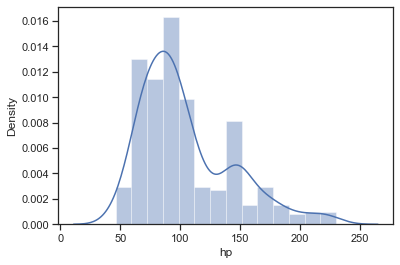

In [96]:
sns.distplot(Car_final['hp'])

In [98]:
new_median = Car_final['hp'].median()

In [99]:
new_median

93.5

In [100]:
Car_final

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


In [85]:
Car_With_noName=Car_final.iloc[:,1:]
Car_Scaled=Car_With_noName.apply(zscore)

In [86]:
Car_Scaled

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,NaN,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,NaN,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,NaN,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,NaN,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,NaN,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,NaN,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,NaN,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,NaN,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,NaN,-0.408411,1.100822,1.621983,-0.715145


In [91]:
Car_final['hp'].isna().any().sum()

1